# Removing Seasonal Noise

The purpose of this mini project is to remove seasonal noise from a small set of data that contains 360 number of points. The data are in two .mat files, `True.mat` and `original.mat`. `original.mat` has the original data which is obtained from an observation, and True.mat file contains the simulation data. The simulation data is there to tell us what the actual data might look like. This report shows the results of a few attemps to remove seasonal noise in the data.

In [1]:
# load the packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# import functions from custom codes in this project
from read_data import read_data
from moving_avg import moving_average
from remove_high_freq import remove_high_freq_noise

In [2]:
# read data from .m files into a DataFrame
df = read_data()
df.head()

,original,true
0,-9.984730,64.054990
1,407.817850,71.681451
2,687.763042,76.882458
3,566.139743,86.665747
4,116.433781,91.277430


<function matplotlib.pyplot.show>

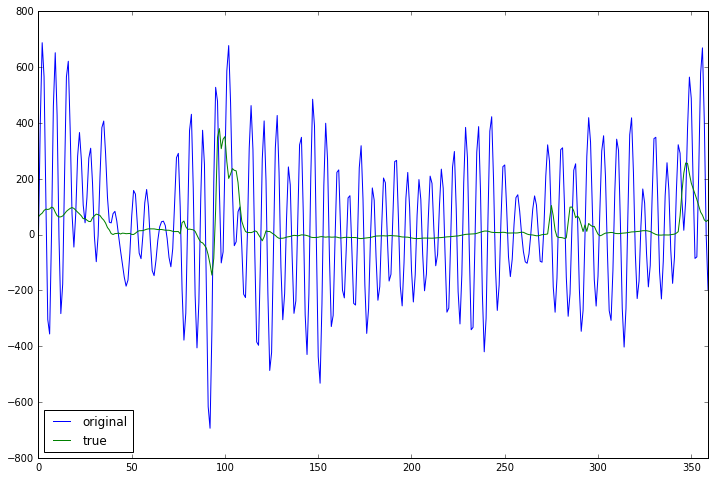

In [3]:
%matplotlib inline

# plot the data
df.plot(figsize=(12,8))
plt.show

## Remove noise by performing running average with optimized values of window size and window type

From the above figure we can see that the noise is strong but somewhat periodic. So if we do the moving average with the right set of window size and window type values then we may suppress the noise.

Best pair of window and win_type are:
window = 19
win_type is  hamming


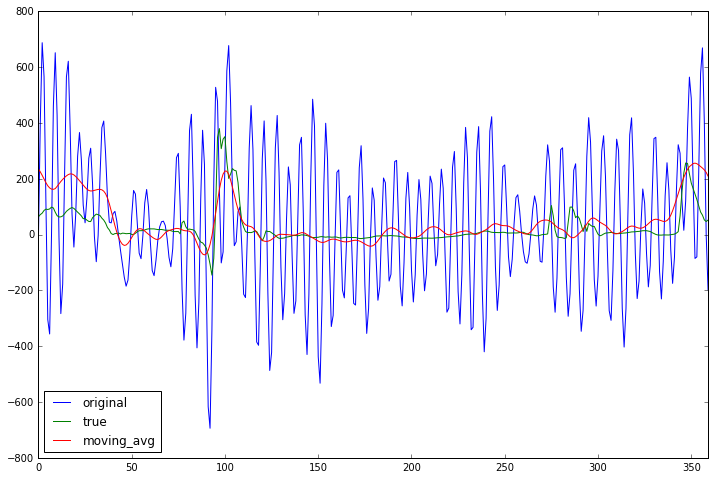

In [4]:
optimal_window = True  # this will set the code to search for optimal window size and window type values
#optimal_window = False
iter_num = 50   # used for creating a search space for window size within [1, 2, ... 50]
err_type = "root-mean-sqrt"   # used as loss a function
#err_type = "mean-absolute"

# Do the moving average with optimal values of window size and window type, which will be printed.
dfn = moving_average(df, window=10, optimal_window=optimal_window, err_type=err_type)
dfn.plot(figsize=(12,8))

## Remove noise by filtering out high frequency components

The noise has higher frequency than the signal so we run the data through a low-pass filter.

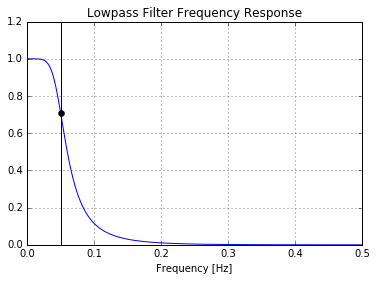

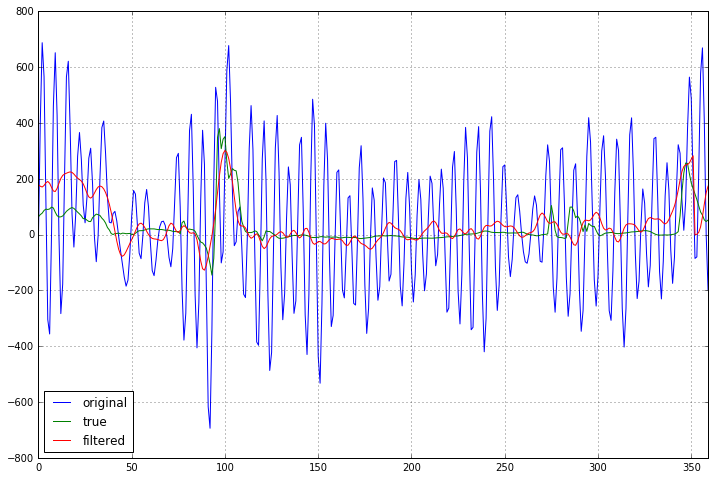

In [5]:
# NOTE: order and cutoff values can be fine tuned for better performance.
dfn = remove_high_freq_noise(df, sample_rate=1.0, order=3,
                            cutoff=0.05)

# plot both the original and filtered signals
fig2, ax2 = plt.subplots(figsize=(12,8))
dfn.plot(ax=ax2)
ax2.grid()
plt.show()
